In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from skimage.feature import hog
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

Descargando dataset LFW
Dataset:
Total de imágenes: 1140
Dimensiones de imagen: 50x37 píxeles
Clases (Personas): 5
Nombres: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


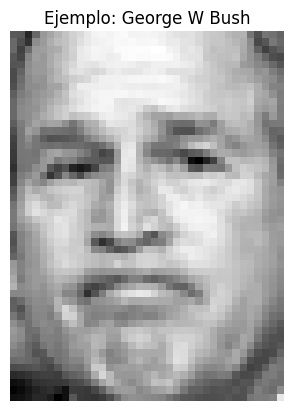

In [6]:
print("Descargando dataset LFW")
lfw_people = fetch_lfw_people(min_faces_per_person=80, resize=0.4)

# Introspección de los datos
n_samples, h, w = lfw_people.images.shape
X_images = lfw_people.images # Las imágenes crudas (2D)
y = lfw_people.target        # Las etiquetas (números)
target_names = lfw_people.target_names # Los nombres reales

print(f"Dataset:")
print(f"Total de imágenes: {n_samples}")
print(f"Dimensiones de imagen: {h}x{w} píxeles")
print(f"Clases (Personas): {len(target_names)}")
print(f"Nombres: {target_names}")

# Visualicemos una imagen de muestra
plt.imshow(X_images[0], cmap='gray')
plt.title(f"Ejemplo: {target_names[y[0]]}")
plt.axis('off')
plt.show()

In [ ]:
def extract_features(images):
    hog_features = []
    print("Iniciando extracción HOG")
    start_time = time.time()
    
    for image in images:
        # Calculamos HOG para cada imagen
        # pixels_per_cell=(8,8) es el estándar de Dalal & Triggs
        fd = hog(image, 
                orientations=9, 
                pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), 
                block_norm='L2-Hys', 
                visualize=False)
        hog_features.append(fd)
        
    return np.array(hog_features)

# Convertimos las imágenes a vectores HOG
X_hog = extract_features(X_images)

print(f"\nDimensiones originales (píxeles planos): {h * w}")
print(f"Dimensiones HOG (feature vector): {X_hog.shape[1]}")

Iniciando extracción HOG

Dimensiones originales (píxeles planos): 1850
Dimensiones HOG (feature vector): 540


In [8]:
# 1. Split: 75% para entrenar, 25% para el examen final del modelo
X_train, X_test, y_train, y_test = train_test_split(
    X_hog, y, test_size=0.25, random_state=42, stratify=y
)

# 2. Entrenar SVM
# LinearSVC es rápido que SVC(kernel='rbf')
print("Entrenando SVM")
clf = LinearSVC(random_state=42, dual="auto", max_iter=10000)
clf.fit(X_train, y_train)
print("Entrenamiento finalizado")

# 3. Evaluar precisión global
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {acc*100:.2f}%")

Entrenando SVM
Entrenamiento finalizado

Precisión del modelo: 88.42%


Caso #87
Predicción SVM: George W Bush
Realidad:       George W Bush

Caso #246
Predicción SVM: George W Bush
Realidad:       George W Bush

Caso #223
Predicción SVM: George W Bush
Realidad:       George W Bush

Caso #252
Predicción SVM: George W Bush
Realidad:       George W Bush



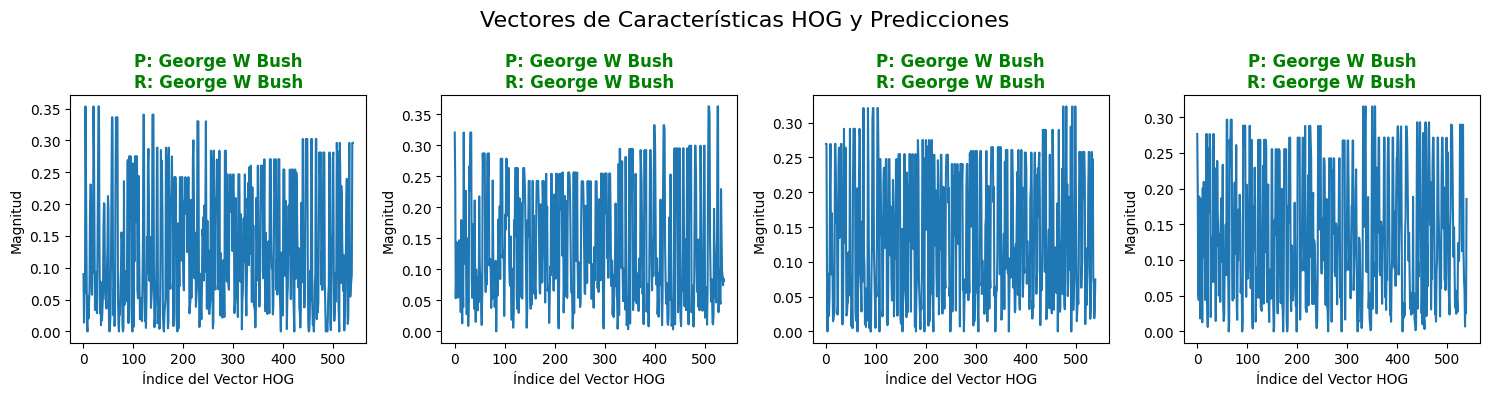

In [9]:
def visualize_prediction(index_in_test_set):
    # Recuperar la imagen original y la etiqueta real
    # X_test tiene los features HOG, pero necesitamos la imagen original para mostrarla.
    # Por eso usamos los índices para rastrear la imagen original en X_images.
    
    # Tomamos un vector HOG del test
    hog_vec = X_test[index_in_test_set].reshape(1, -1)
    prediction = clf.predict(hog_vec)[0]
    true_label = y_test[index_in_test_set]
    
    # Nombre predicho vs Real
    pred_name = target_names[prediction]
    true_name = target_names[true_label]
    
    color = 'green' if prediction == true_label else 'red'
    
    print(f"Caso #{index_in_test_set}")
    print(f"Predicción SVM: {pred_name}")
    print(f"Realidad:       {true_name}")
    print()
    return pred_name, true_name, color

# Probando con 4 casos aleatorios
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
indices = np.random.choice(len(X_test), 4, replace=False)

for i, ax in enumerate(axes):
    idx = indices[i]
    pred, true, color = visualize_prediction(idx)
    
    # Mostrar un gráfico de barras de los features HOG
    ax.plot(X_test[idx])
    ax.set_title(f"P: {pred}\nR: {true}", color=color, fontweight='bold')
    ax.set_xlabel("Índice del Vector HOG")
    ax.set_ylabel("Magnitud")
    
plt.suptitle("Vectores de Características HOG y Predicciones", fontsize=16)
plt.tight_layout()
plt.show()